In [1]:
import taunet_utils
from os.path import join
import pandas as pd
import seaborn as sns
import json
from augmolino import augmentation, augmenter
import numpy as np

In [2]:
input_data, output_data = taunet_utils.create_dataset(join("dataset", "audio"), 
                                                      join("dataset", "human_input", "AITD_Dataset_Luka_1.csv"),
                                                      join("..", "src", "af", "AFInC.dll"),
                                                      join("dataset", "saved", "AITD_Dataset_Luka_1.json"))

with open(join("dataset", "saved", "AITD_Dataset_Luka_1in.json"), "r") as json_file:
    input_data = json.load(json_file)
with open(join("dataset", "saved", "AITD_Dataset_Luka_1out.json"), "r") as json_file:
    output_data = json.load(json_file)

data = dict()
for key in input_data.keys():
    data[key] = input_data[key] + output_data[key]
print(data)
df = pd.DataFrame.from_dict(data).T
# df.index = df.index.astype(int)
df = df.sort_index()
df.columns = ["TEMPO",
              "T1A", 
              "T2A", 
              "CENTROID", 
              "L", 
              "ML", 
              "MH", 
              "H", 
              "CREST",
              "FLUX",
              "ATTACK_CUT",
              "ATTACK_BOOST",
              "SUSTAIN_GAIN",
              "ATTACK_T1",
              "SUSTAIN_T1"]
df.head()


processed 1 4397-spicy-drums...
processed 1 h_shift_96000_-1...
processed 1 und_mix_0_9_None...
processed 1 ch_shift_96000_1...
processed 1 und_mix_0_9_None...
processed 1 und_mix_0_9_None...
processed 1 s_time_fade_1_in...
processed 1 und_mix_0_9_None...
processed 1 _time_fade_1_out...
processed 1 und_mix_0_9_None...
processed 1 time_offset_-0_5...
processed 1 und_mix_0_9_None...
processed 1 time_offset_-1_0...
processed 1 und_mix_0_9_None...
processed 1 time_offset_-1_5...
processed 1 und_mix_0_9_None...
processed 1 time_offset_-2_0...
processed 1 und_mix_0_9_None...
processed 1 _time_offset_0_0...
processed 1 und_mix_0_9_None...
processed 1 _time_offset_0_5...
processed 1 und_mix_0_9_None...
processed 1 _time_offset_1_0...
processed 1 und_mix_0_9_None...
processed 1 _time_offset_1_5...
processed 1 und_mix_0_9_None...
processed 2 x-808-x-percs-kb...
processed 2 h_shift_96000_-1...
processed 2 und_mix_0_9_None...
processed 2 ch_shift_96000_1...
processed 2 und_mix_0_9_None...
processe

,TEMPO,T1A,T2A,CENTROID,L,ML,MH,H,CREST,FLUX,ATTACK_CUT,ATTACK_BOOST,SUSTAIN_GAIN,ATTACK_T1,SUSTAIN_T1
1 4397-spicy-drums,0.7748,0.0578,0.2702,0.5189,0.4836,0.5895,0.1336,0.0194,0.5037,0.3169,0.9841,0.3708,0.0,0.796405,0.769905
1 _time_fade_1_out,0.7769,0.0672,0.2731,0.6014,0.5813,0.6499,0.2178,0.0448,0.4886,0.2455,0.9841,0.3708,0.0,0.796405,0.769905
1 _time_offset_0_0,0.7748,0.0671,0.2731,0.2938,0.5299,0.6201,0.1984,0.0408,0.4886,0.2376,0.9841,0.3708,0.0,0.796405,0.769905
1 _time_offset_0_5,0.7748,0.0671,0.2731,0.2938,0.5299,0.6201,0.1984,0.0408,0.4886,0.0000,0.9841,0.3708,0.0,0.796405,0.769905
1 _time_offset_1_0,0.7748,0.0671,0.2731,0.2938,0.5299,0.6201,0.1984,0.0408,0.4886,0.0000,0.9841,0.3708,0.0,0.796405,0.769905


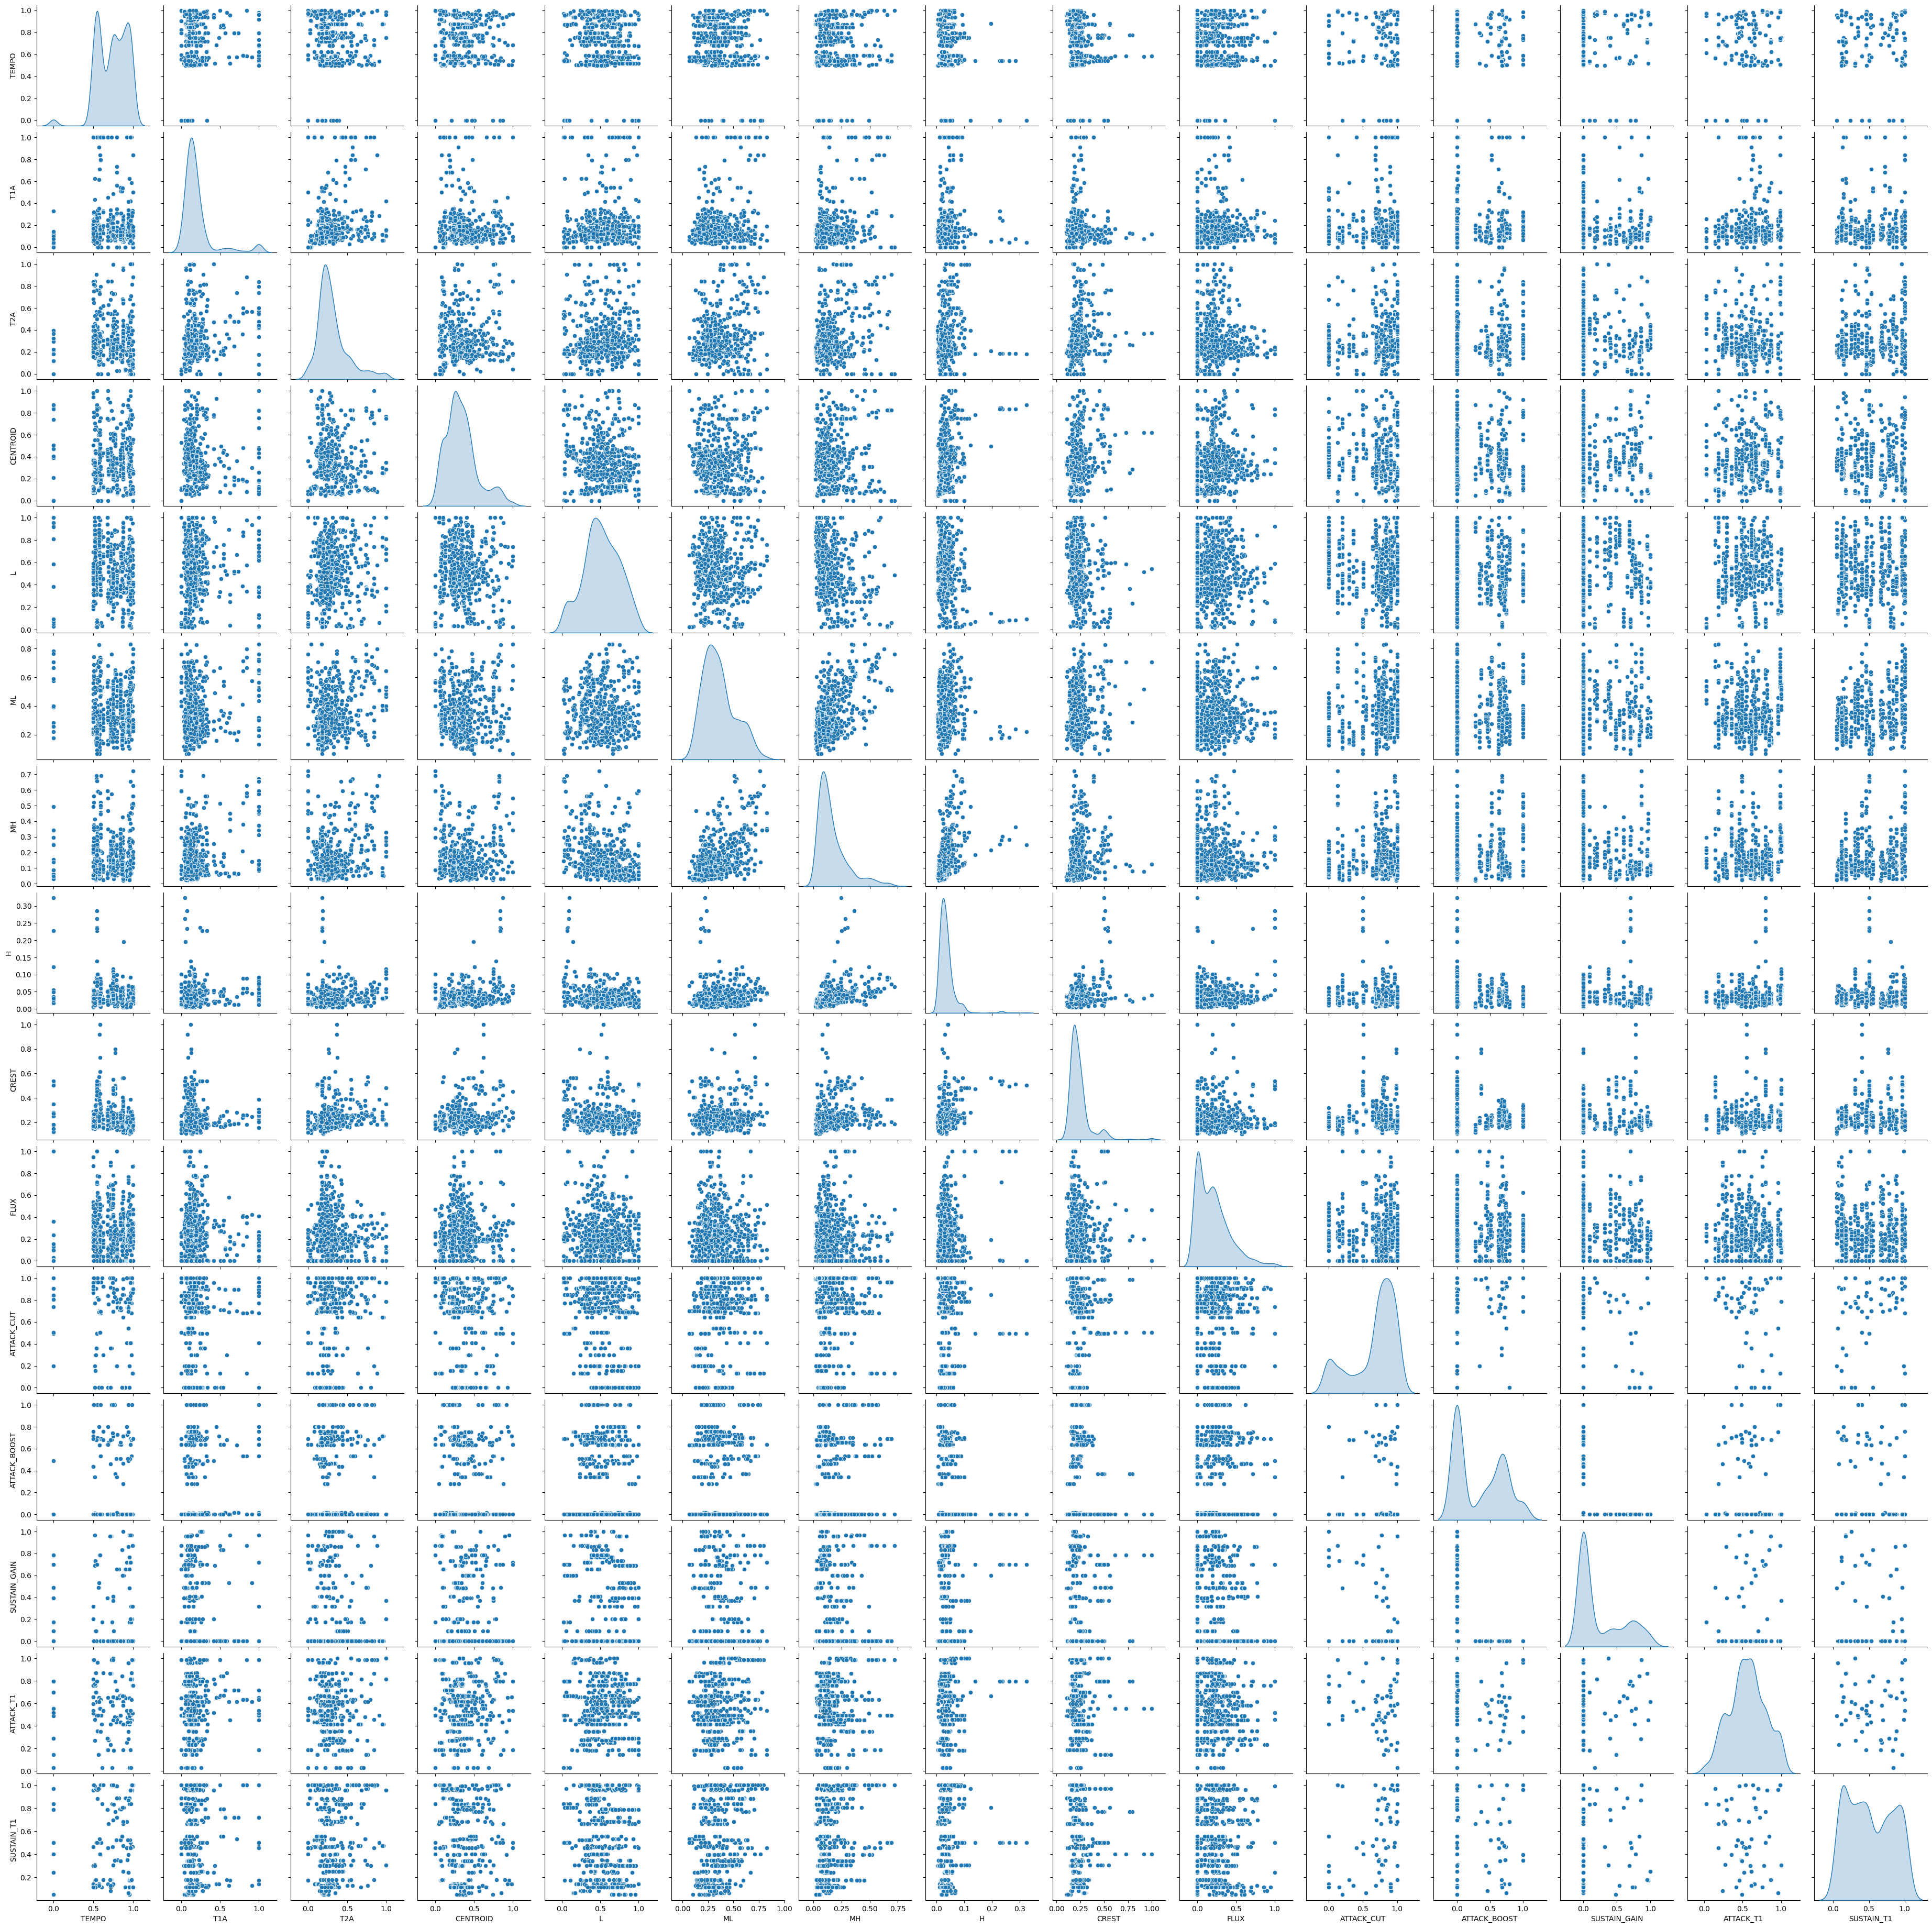

In [3]:
sns.pairplot(data=df, diag_kind='kde')

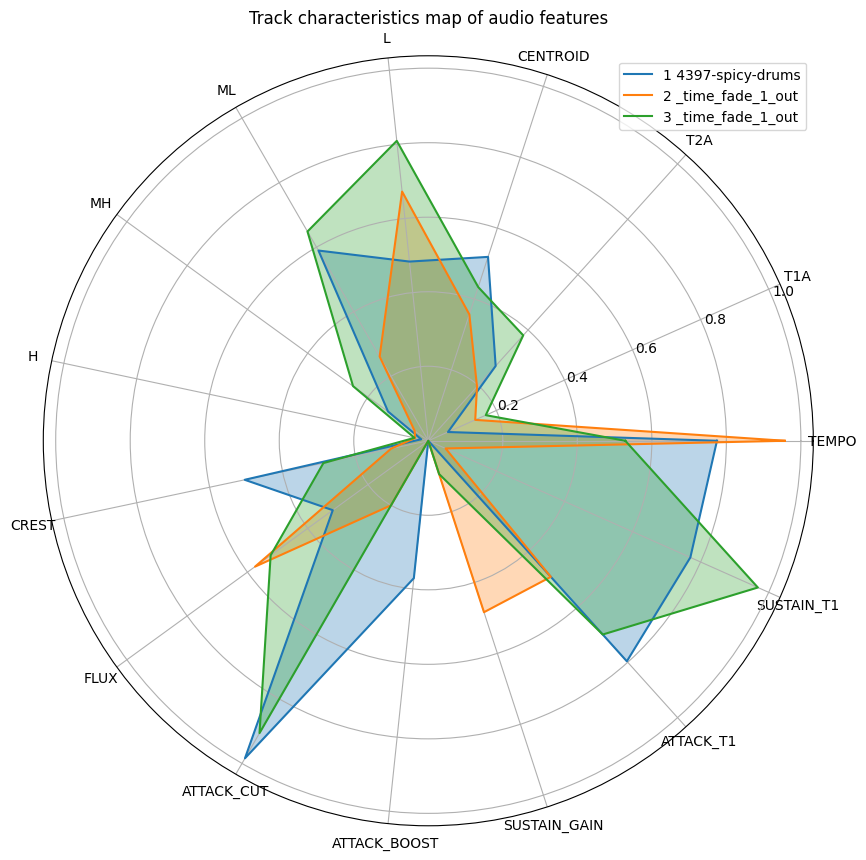

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume you already have a DataFrame called df with the desired structure and data

# Select unique index numbers
unique_numbers = df.index.str[0].unique()[:3]  # Select first 3 unique index numbers

# Create polar subplot
fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(10,10))

# Plot each subset separately
for num in unique_numbers:
    subset_df = df[df.index.str.startswith(str(num))]
    label = subset_df.index[0]
    categories = subset_df.columns.tolist()
    data = subset_df.values[0]  # Selecting the first row of the subset for plotting
    
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    data = np.concatenate((data, [data[0]]))
    angles += angles[:1]

    ax.plot(angles, data, label=label)
    ax.fill(angles, data, alpha=0.3)  # Fill the inner part with semi-transparent color

# Set tick labels to DataFrame index
ax.set_xticks(angles[:-1])
ax.set_xticklabels(df.columns.tolist())

plt.legend()
plt.title('Track characteristics map of audio features')
plt.show()


In [5]:
augmentations = []
offsets = np.arange(-2, 2, 0.5)
for offset in offsets:
    augmentations.append(augmentation.offsetAudio(offset, sample_rate=96000))

augmentations.append(augmentation.pitchShift(1, sample_rate=96000))
augmentations.append(augmentation.pitchShift(-1, sample_rate=96000))
augmentations.append(augmentation.fadeAudio(1, "in", sample_rate=96000))
augmentations.append(augmentation.fadeAudio(1, "out", sample_rate=96000))
augmentations.append(augmentation.mixAudio(join("dataset", "1 pink_noise.wav"), ratio=0.9, sample_rate=96000))
augmentations.append(augmentation.mixAudio(join("dataset", "2 white_noise.wav"), ratio=0.9, sample_rate=96000))

augs_offs = augmenter.augmenter(augmentations)
augs_offs.summary()


------------augmenter.summary------------
-----------------------------------------
 number of augmentations: 14     

 type:                                   
 > time_offset                 
 > time_offset                 
 > time_offset                 
 > time_offset                 
 > time_offset                 
 > time_offset                 
 > time_offset                 
 > time_offset                 
 > pitch_shift                 
 > pitch_shift                 
 > time_fade                 
 > time_fade                 
 > sound_mix                 
 > sound_mix                 
------------augmenter.summary------------



In [6]:
# augs_offs.execute(join("dataset", "audio"), "auto")